<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JSOrtegaB/blob/main/Semana_7/Semana7_Modulo4_DataAnalisis_IBM_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 7: Data Analysis with Python (IBM) Módulo 4
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327

# Desarrollo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(url)
df.shape

(201, 29)

In [ ]:
pd.set_option("display.max_columns", 29)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Encuentra datos faltates en filas de precio y los borra

In [ ]:
df.replace('?',np.NaN).dropna(subset=['price'], inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Coeficente y interseccción

In [ ]:
print("b=",lm.intercept_)
print("m=",lm.coef_)

b= 38423.3058581574
m= [-821.73337832]


Equación de regresión

In [ ]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
print("m=",lm1.coef_)
print("b=",lm1.intercept_)
print("Yhat="+str(lm1.coef_[0].round(2))+"x"+ ("+" if lm1.intercept_>0 else "") +str(lm1.intercept_.round(2)))

m= [166.86001569]
b= -7963.338906281042
Yhat=166.86x-7963.34


Multiple Linear Regression

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [ ]:
lm2=LinearRegression()
Z1 = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z1, df['price'])
lm2

LinearRegression()

In [ ]:
lm2.coef_

array([   1.49789586, -820.45434016])

Model Evaluation Using Visualization

In [ ]:
import seaborn as sns
%matplotlib inline 

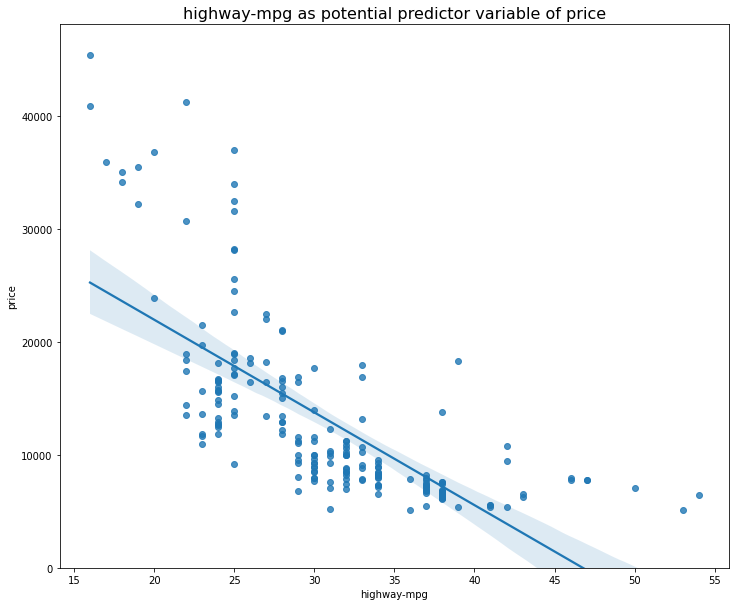

In [ ]:
width = 12
height = 10

plt.figure(figsize=(width, height))
plt.title('highway-mpg as potential predictor variable of price', fontsize=16)
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

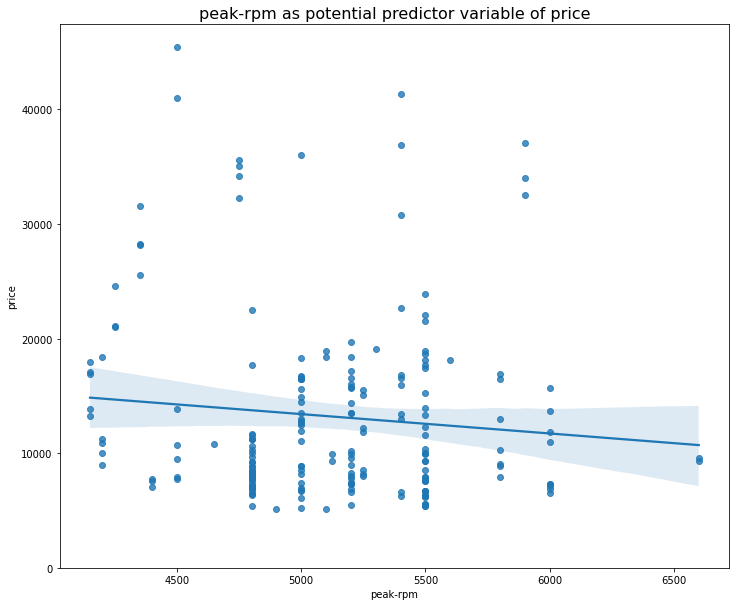

In [ ]:
plt.figure(figsize=(width, height))
plt.title('peak-rpm as potential predictor variable of price', fontsize=16)
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.show()

Cual esta mas correlacionado

Correlación positiva entre tamaño de motor y precio

In [ ]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


visualización de Regresión lineal múltiple

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


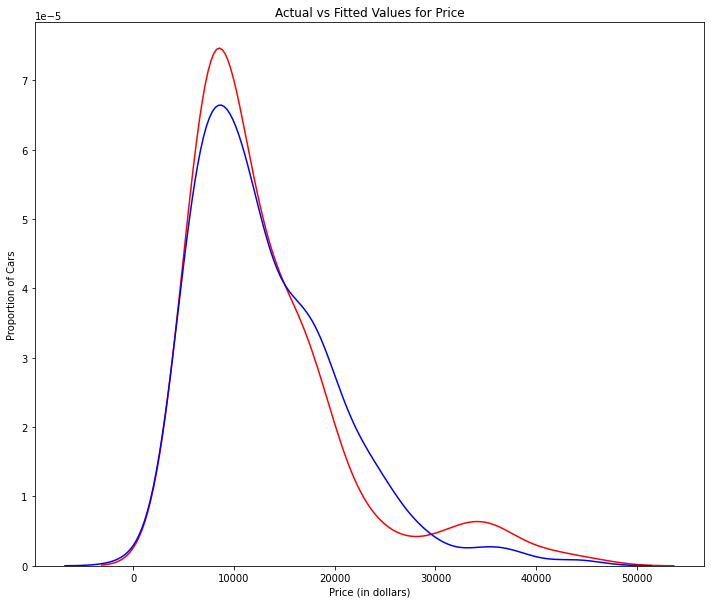

In [ ]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,df['price'])
Y_hat = lm.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Funcion para graficar

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


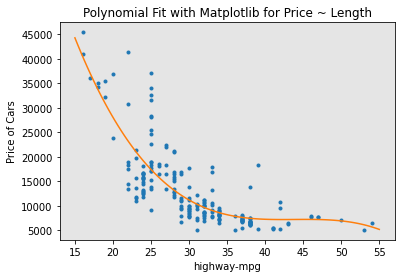

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

Con polinomio de 11o grado

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


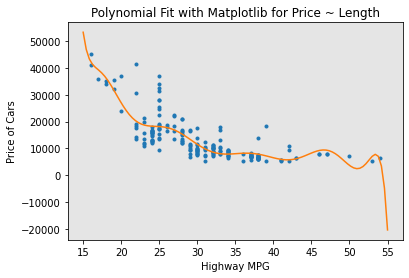

In [ ]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
PlotPolly(p,x,y, 'Highway MPG')

Transformación polinomial de múliples características

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)
print("Caracteristicas originales:\t",Z.shape)
print("Caracteristicas transformadas:\t",Z_pr.shape)

Caracteristicas originales:	 (201, 4)
Caracteristicas transformadas:	 (201, 15)


Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### MSE

Model 1: Simple Linear Regression

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [ ]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769093756598


MSE

In [ ]:
mean_squared_error(df['price'], p(x))

18703127.63085496

Prediction and Decision Making

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X.values, Y)
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

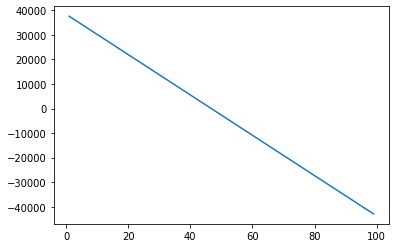

In [ ]:
plt.plot(new_input, yhat)
plt.show()

# Graded Review Questions

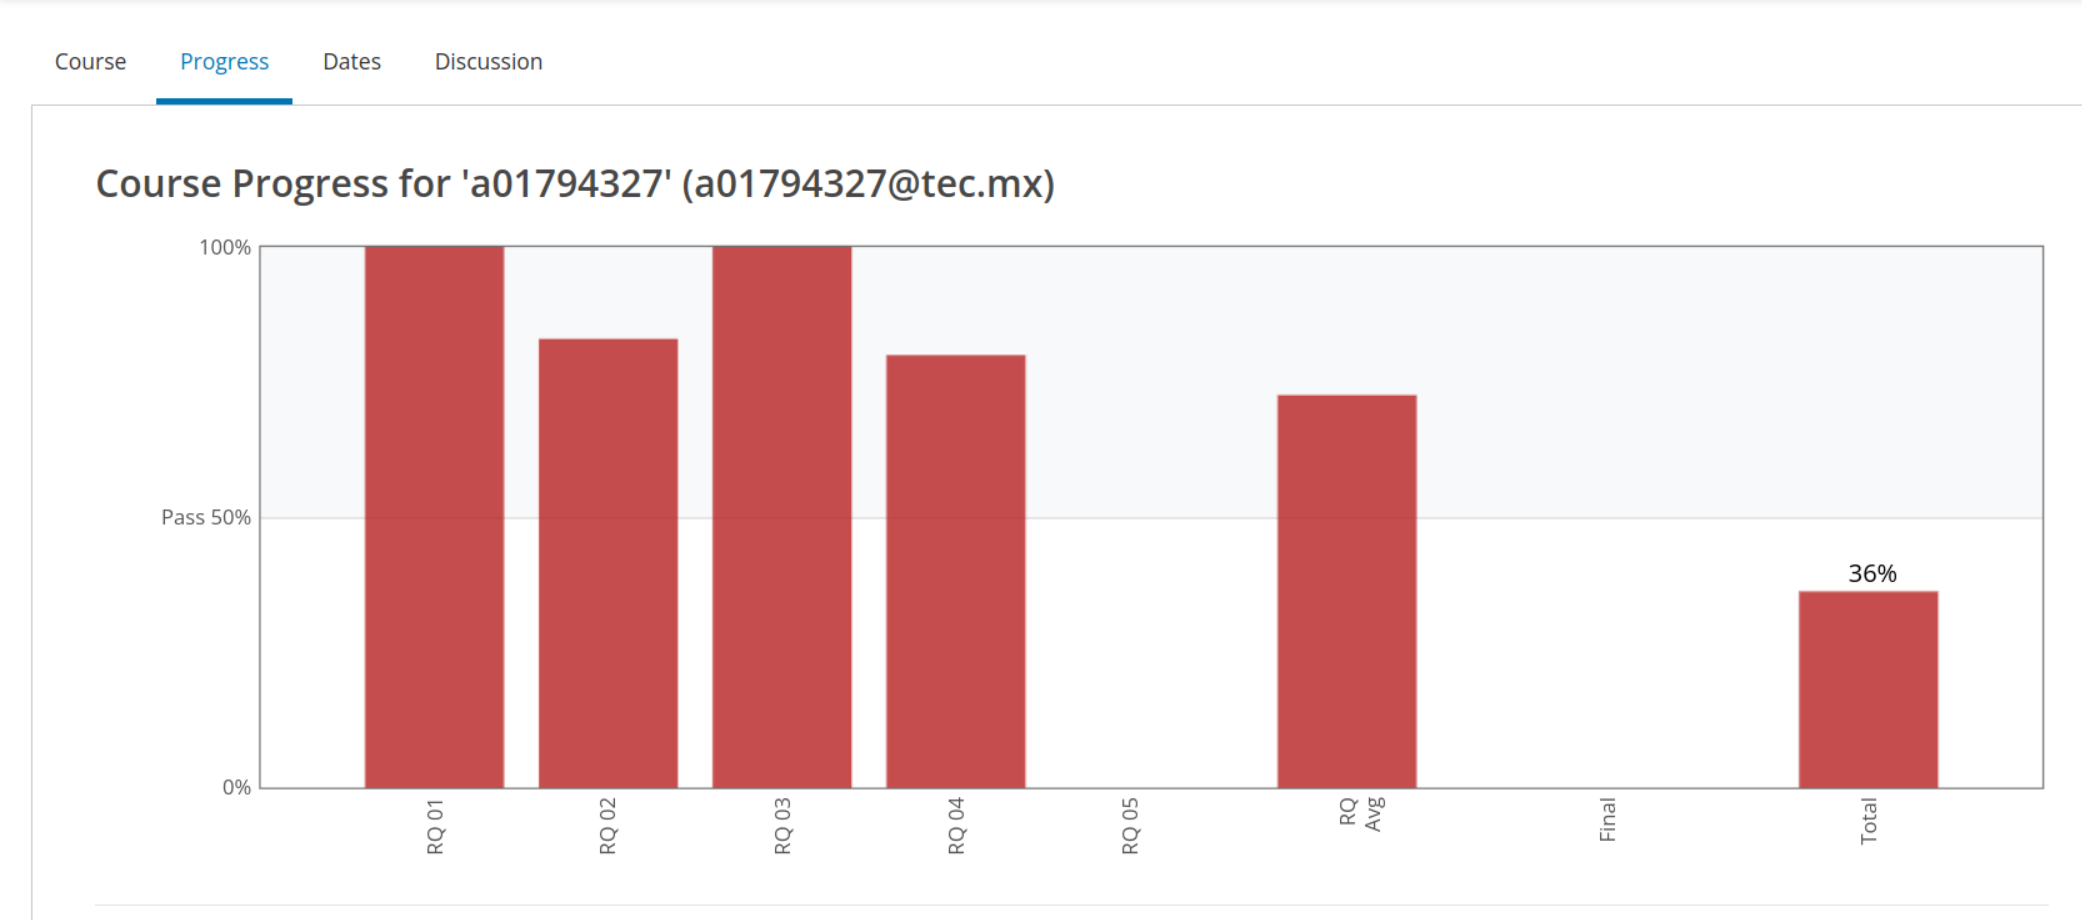

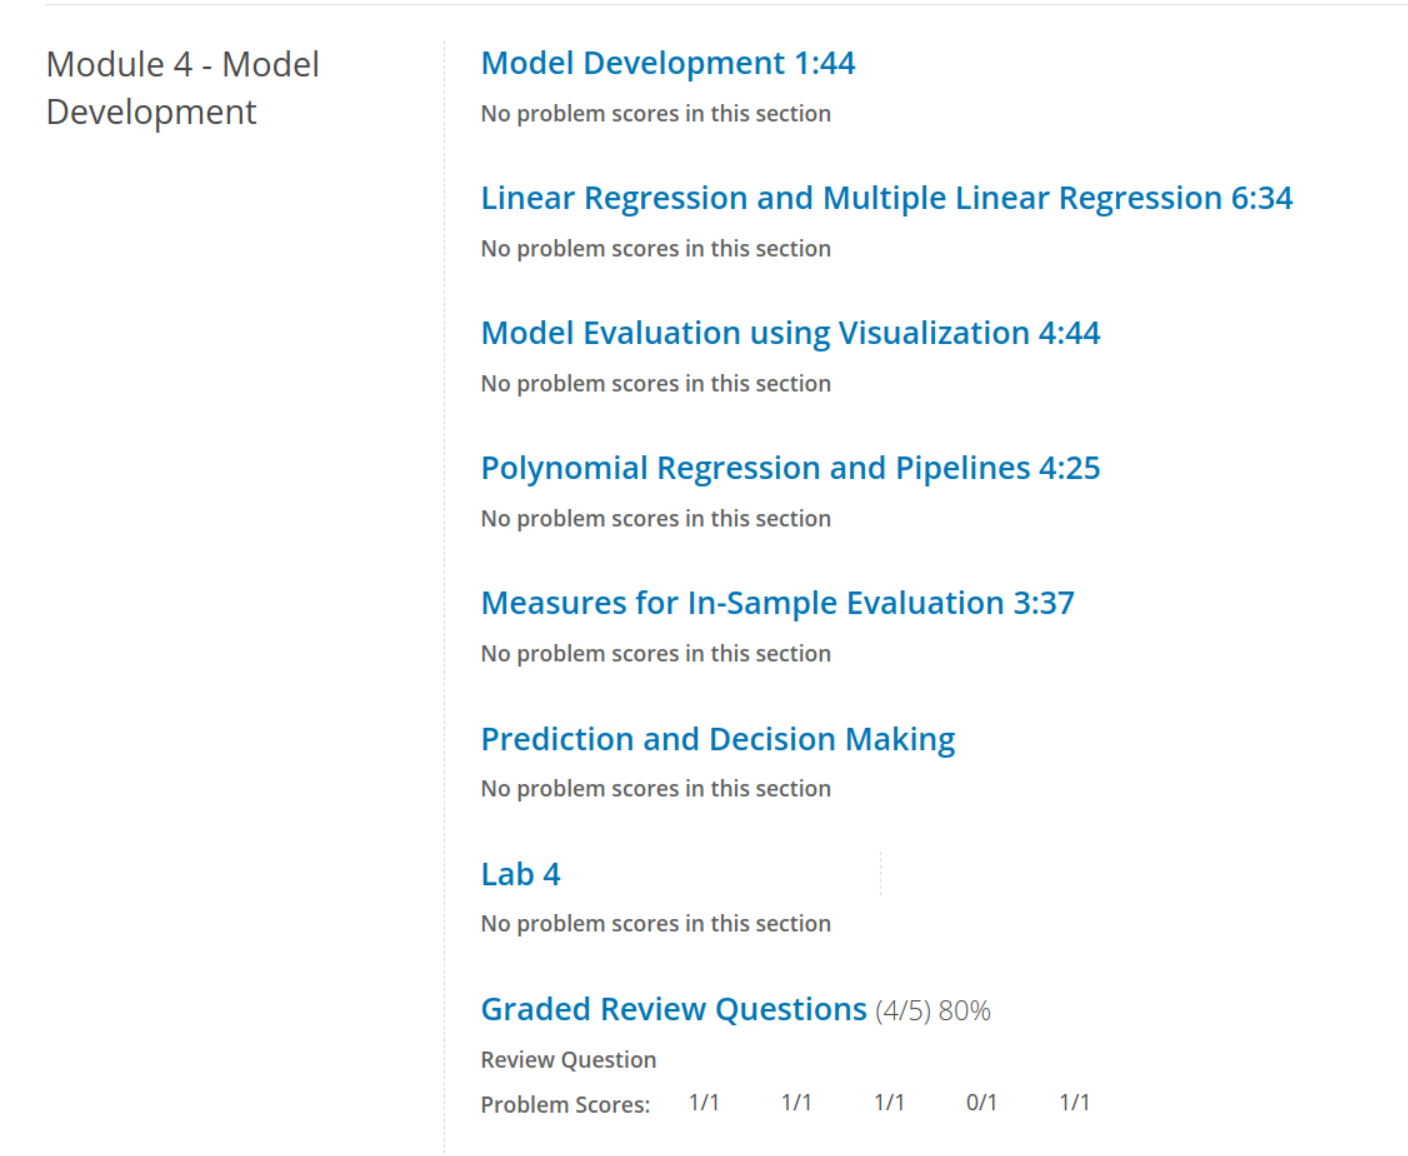

# Evidencias

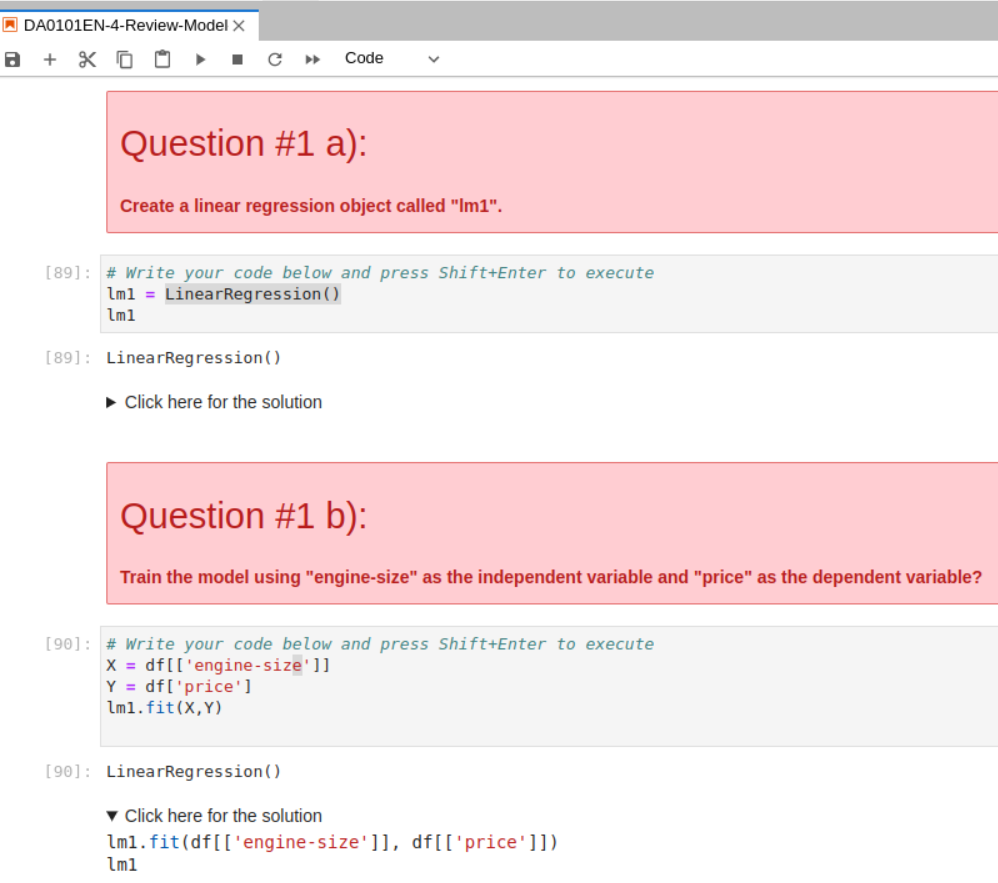

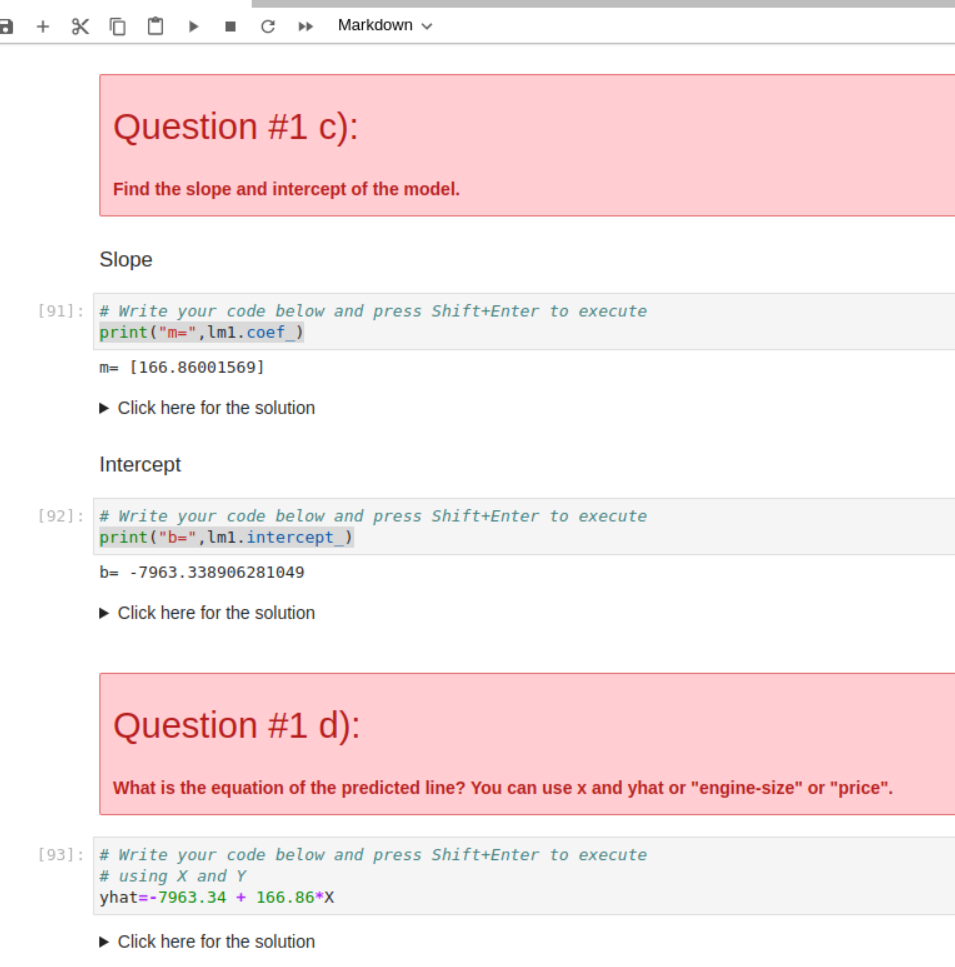

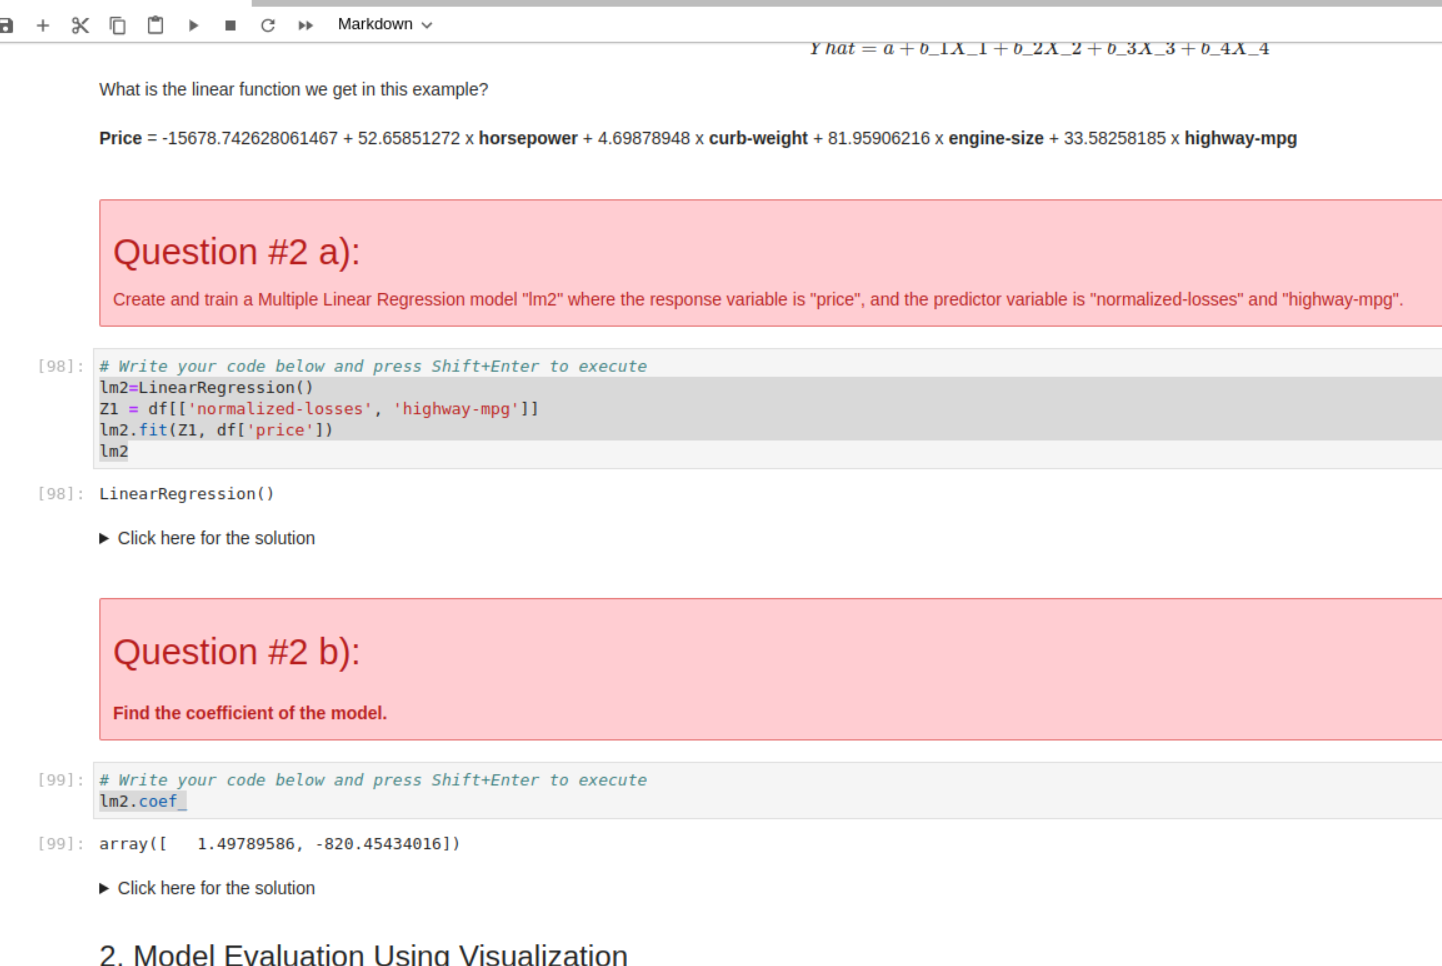

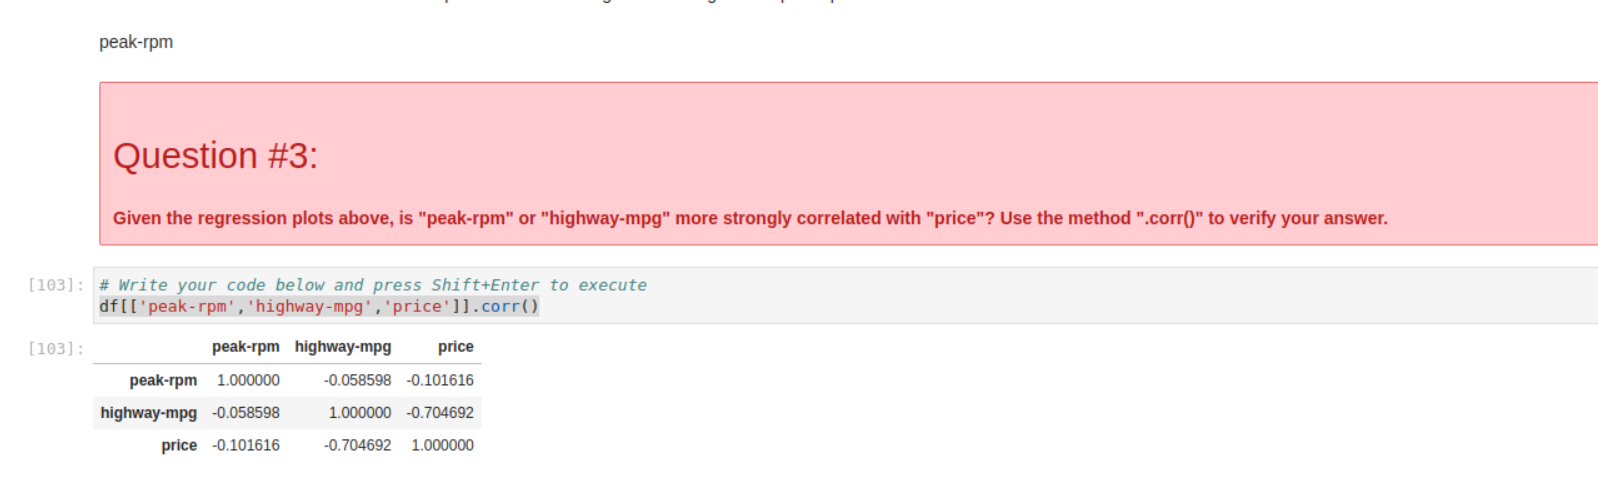

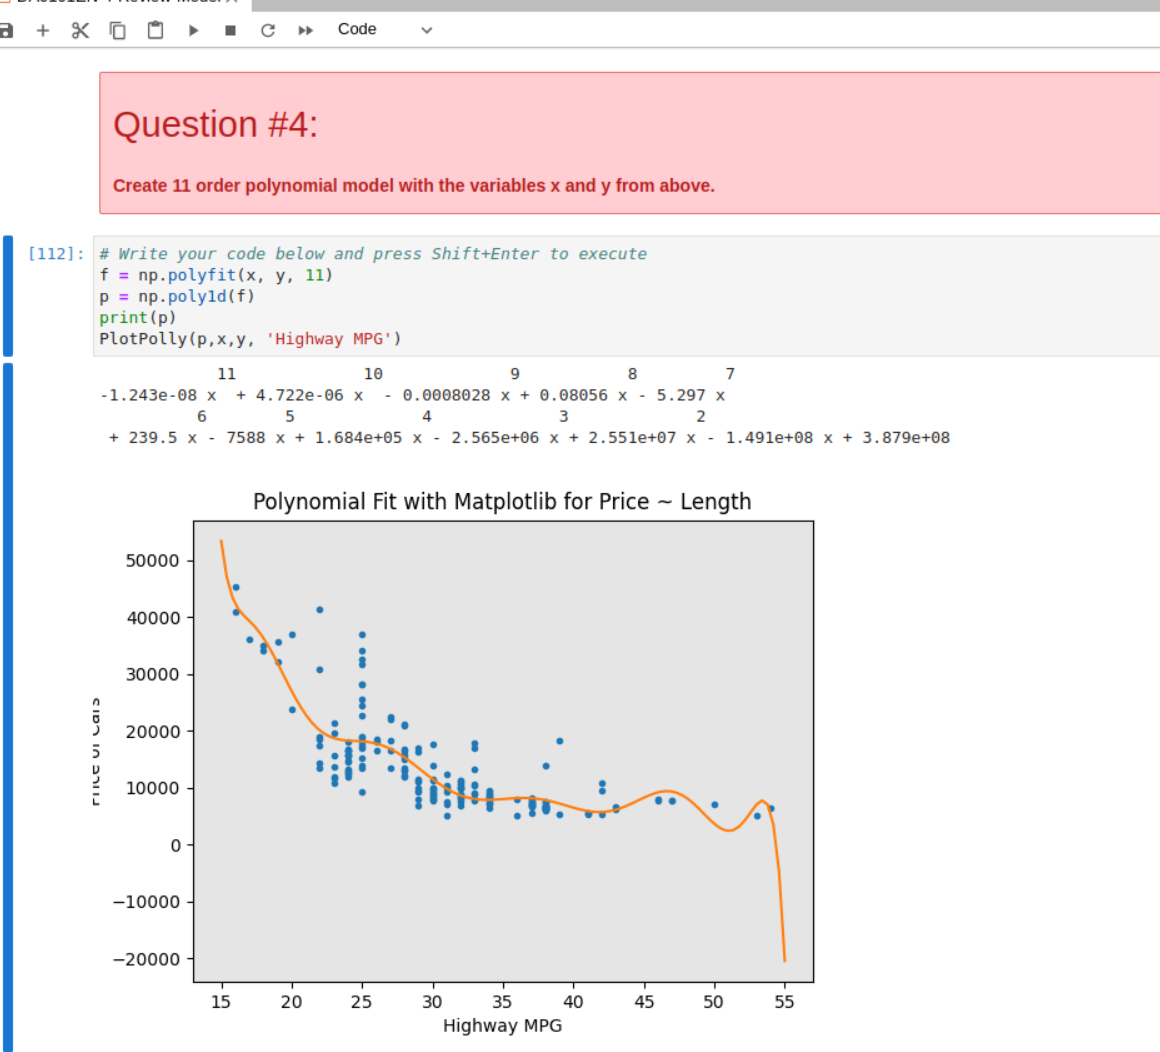

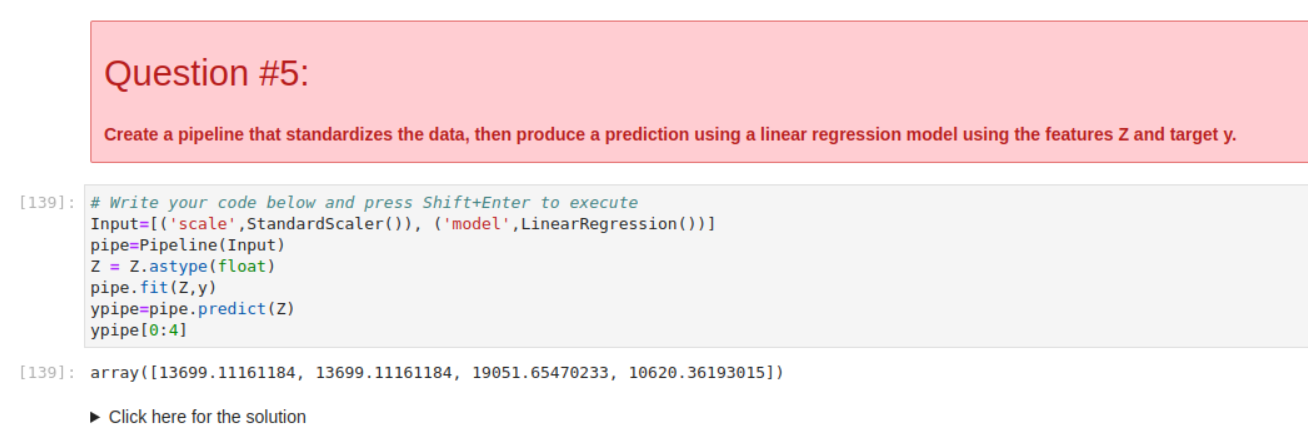

Referencia:
Laboratorio 4 de Curso de IBM: Cognitive Class Home DA0101EN
Data Analysis with Python